In [1]:
%pylab inline
from scipy.spatial.distance import cdist

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
def find_dists(X,rep):
    C=cdist(X,rep)
    index=argmin(C,axis=1)
    dist=np.min(C,axis=1)
    return index,dist

def find_cover_iter(rep,X,epsilon=1,debug=False) :
    m=X.shape[0]
    found=False
    for i in range(m):
        x=X[i:i+1,:]  # can make more efficient by checking several at once and keeping 
                      # track of the location of the last find.
        _,dist=find_dists(x,rep)
        if np.min(dist)>epsilon:
            if debug:
                print(i,np.min(dist),rep.shape)
            rep=concatenate([rep,x],axis=0)
            found=True
    return rep,found

def source(m,n):
    " a generator of example batches"
    while True:
        yield (rand(m,n)*2)-1

def find_cover(rep,source,epsilon=1,debug=False):
    found=True; j=0
    cover=rep
    for X in source():
        cover,found=find_cover_iter(cover,X,epsilon=epsilon,debug=debug)
        if debug:
            print('### round ',j,cover.shape); j+=1
        if not found:
            break
    return cover

def split(X,cover):
    """ Partition rows in X according to the cclosest row in cover"""
    index,dist = find_dists(X,cover)
    
    subset=[]
    for i in range(cover.shape[0]):
        s=X[nonzero(index==i),:]
        subset.append(s[0,:,:])
    return subset

In [3]:
n=2;
m=3
rep=eye(n)
X=concatenate([eye(n)*(1+0.1*i) for i in range(m)],axis=0)
X.shape

(6, 2)

In [4]:
X

array([[1. , 0. ],
       [0. , 1. ],
       [1.1, 0. ],
       [0. , 1.1],
       [1.2, 0. ],
       [0. , 1.2]])

In [5]:
index,dist = find_dists(X,rep)

In [6]:
index

array([0, 1, 0, 1, 0, 1])

In [7]:
dist

array([0. , 0. , 0.1, 0.1, 0.2, 0.2])

### finding a cover

In [12]:
%%time
n=2
rep=array([zeros(n)])
rep.shape
epsilon=1
m=10000

def source():
    while True:
        yield (rand(m,n)*2)-1
        
cover=find_cover(rep,source,epsilon=epsilon)

CPU times: user 159 ms, sys: 4.82 ms, total: 164 ms
Wall time: 165 ms


In [13]:
cover.shape

(5, 2)

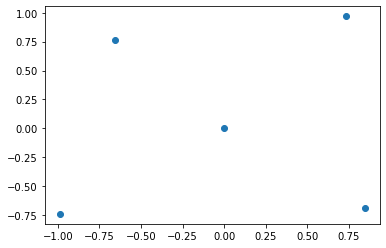

In [14]:
scatter(cover[:,0],cover[:,1])

### Split Examples

In [15]:
X=source().__next__()


index.shape, X.shape

((6,), (10000, 2))

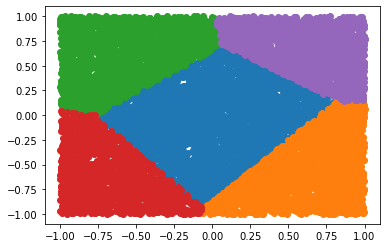

In [16]:
subset=split(X,cover)

for s in subset:
    scatter(s[:,0],s[:,1])

In [15]:
data=[]
j=0
for x in source():
    break
x.shape

(10000, 2)

In [16]:
x.dump('square.npy')

In [17]:
!ls -l square.npy

-rw-r--r--  1 yoavfreund  staff  249823 Jul  9 17:29 square.npy
